<a href="https://colab.research.google.com/github/CaptainComputer1/CECS550Project/blob/Ellis_PR/EM_PR_Final_DataVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Repeat Buyers Prediction for E-Commerce

### Problem Statement
Merchants often gain many new customers through promotions, but a significant portion of these customers are only interested in one-time deals. Therefore, the impact of promotions on long-term sales may be limited. To maximize return on investment (ROI) and reduce promotion costs, it is crucial for merchants to distinguish between one-time buyers and potential loyal customers and focus their efforts on converting the latter group.

In this project, you are provided a dataset with information on promotional shopping event from e-commerce platform. Your task is to design a system which will increase the ROI (in other words, you need to predict the probability that these new buyers would purchase items from the same merchants again within 6 months), reduce promotional cost, and identify one-time buyers. 



In [12]:
import pandas as pd

user_logs = pd.read_csv('/content/drive/MyDrive/PR_Final/user_log.csv')
user_info = pd.read_csv('/content/drive/MyDrive/PR_Final/user_info.csv')
train = pd.read_csv('/content/drive/MyDrive/PR_Final/train.csv')
test = pd.read_csv('/content/drive/MyDrive/PR_Final/test.csv')

# New Section

In [18]:
user_logs.head(5)

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type
0,219316,472,737,801,5890.0,1900-10-18,0
1,69247,471,1266,4614,4331.0,1900-06-19,2
2,69247,471,1266,4614,4331.0,1900-06-19,0
3,216952,352,991,3527,869.0,1900-06-26,0
4,216952,352,991,3527,869.0,1900-06-26,0


In [19]:
user_logs.shape

(7402, 7)

# Data Visualization

4 Data Frames 

**User Behavior**, with 6 columns, *user_id*: a unique id for the shopper, *item_id*: a unique id for the item, *cat_id*, a unique id for the category that the item belongs to, *merchant_id*: a unique id for the merchant, *brand_id*: a unique id for the brand of the item, *time_stamp*: date the action took place (format: mmdd), and *action_type*: it is an enumerated type {0, 1, 2, 3}, where 0 is for click, 1 is for add-to-cart, 2 is for purchase and 3 is for add-to-favorite. 

**User Profile**, with 3 columns, *user_id*: a unique id for the shopper, *age_range*: user's age range, 1 for younger than 18, 2 for 18-24, 3 for 25-29, 4 for 30-34, 5 for 35-39, 6 for 40-49, 7 and 8 for older than 50, and 0 and Null for unknown, and *gender*: user's gender, 0 for female, 1 for male, and 2 for Null or unknown. 

**Training and Testing**, *user_id*: a unique id for the shopper, *merchant_id*: a unqiue id for the merchant, and *label*: it is an enumerated type{0, 1}, where 1 means repeat buyer, 0 is for non-repeat buyer. This field is blank for test data.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

### User Behavior data visualization


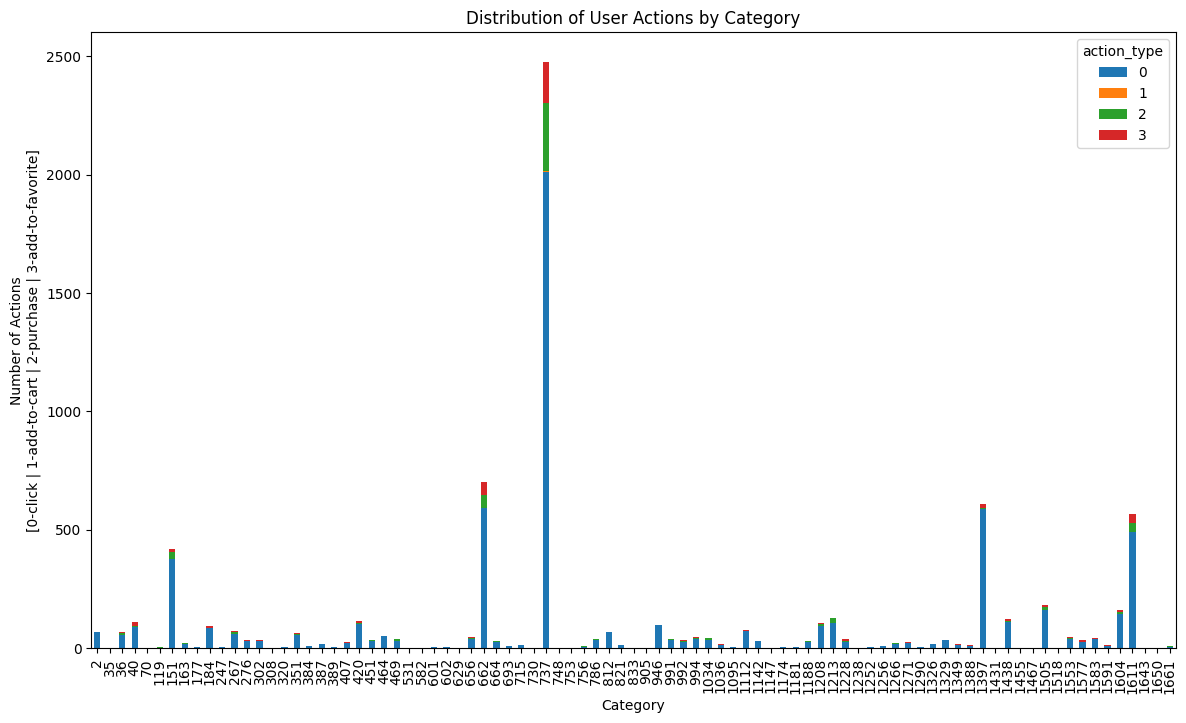

In [31]:
# Pivot table - to aggregate the number of actions by category and action type
pivot_table = user_logs.pivot_table(index="cat_id", columns="action_type", values="user_id", aggfunc="count")

# Stacked Bar Chart - to visualize the distributions of actions across different merchants or brands
pivot_table.plot(kind="bar", stacked=True, figsize=(14, 8))

plt.title("Distribution of User Actions by Category")
plt.xlabel("Category")
plt.ylabel("Number of Actions\n[0-click | 1-add-to-cart | 2-purchase | 3-add-to-favorite]")


plt.show()

Text(0, 0.5, 'Number of Actions\n[0-click | 1-add-to-cart | 2-purchase | 3-add-to-favorite]')

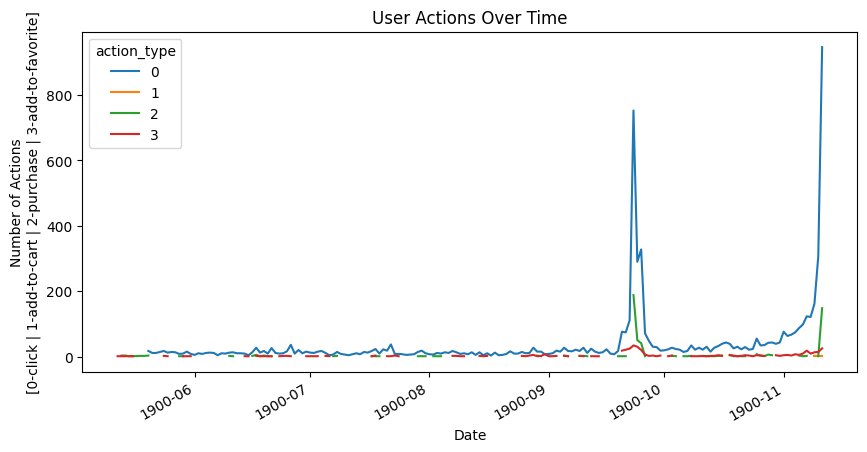

In [28]:
# Convert time_stamp to datetime format: mmdd
user_logs["time_stamp"] = pd.to_datetime(user_logs["time_stamp"], format="%mm%dd")

# Pivot table - to aggregate the number of actions by date and action type
pivot_table = user_logs.pivot_table(index="time_stamp", columns="action_type", values="user_id", aggfunc="count")

# Line chart - to visualize the trend of user actions over time
pivot_table.plot(kind="line", figsize=(10, 5))


plt.title("User Actions Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Actions\n[0-click | 1-add-to-cart | 2-purchase | 3-add-to-favorite]")



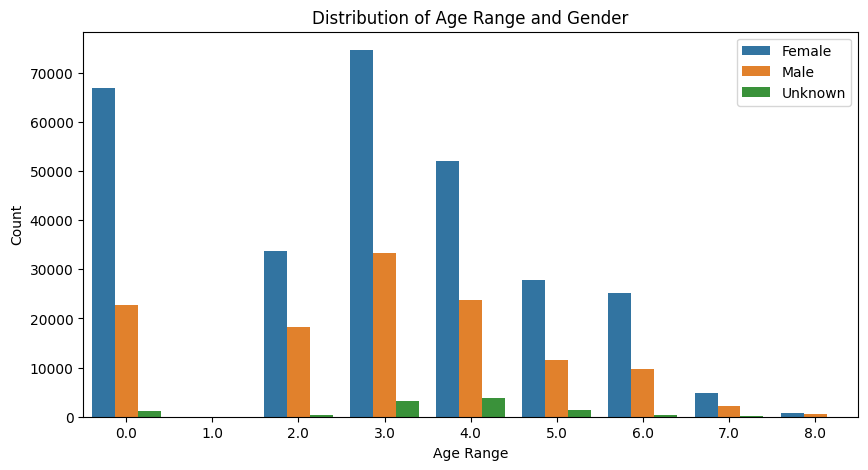

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='age_range', hue='gender', data=user_info)
plt.title('Distribution of Age Range and Gender')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.legend(['Female', 'Male', 'Unknown'])
plt.show()

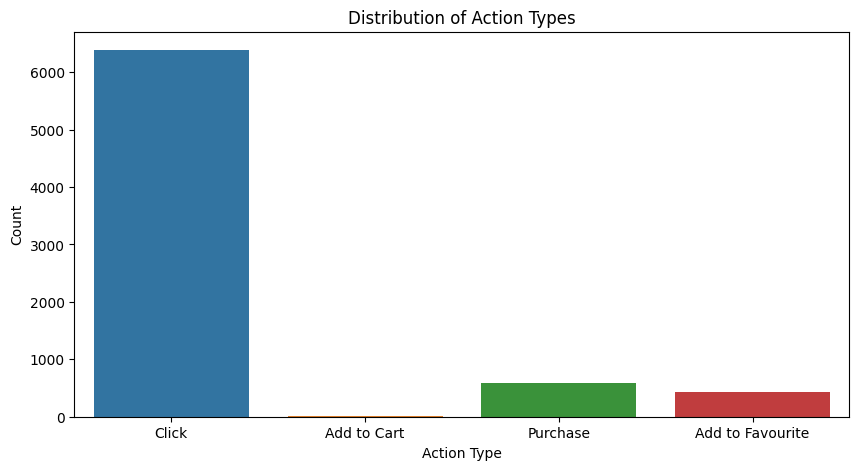

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(x='action_type', data=user_logs)
plt.title('Distribution of Action Types')
plt.xlabel('Action Type')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3], ['Click', 'Add to Cart', 'Purchase', 'Add to Favourite'])
plt.show()

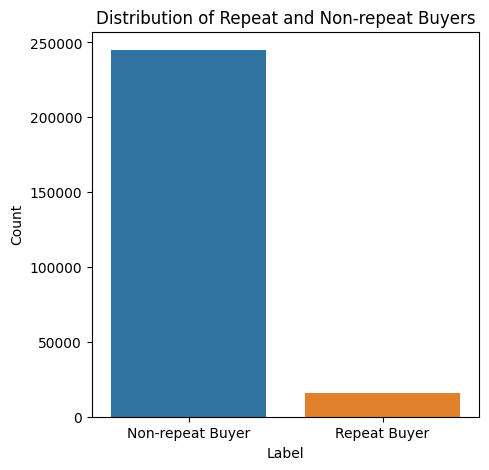

In [ ]:
plt.figure(figsize=(5, 5))
sns.countplot(x='label', data=train)
plt.title('Distribution of Repeat and Non-repeat Buyers')
plt.xlabel('Label')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-repeat Buyer', 'Repeat Buyer'])
plt.show()

In [ ]:
merged_data = pd.merge(user_logs, user_info, on='user_id', how='left')
merged_data.head()

,user_id,item_id,cat_id,seller_id,brand_id,time_stamp,action_type,age_range,gender
0,219316,472,737,801,5890.0,1018,0,4.0,0.0
1,69247,471,1266,4614,4331.0,619,2,4.0,1.0
2,69247,471,1266,4614,4331.0,619,0,4.0,1.0
3,216952,352,991,3527,869.0,626,0,5.0,2.0
4,216952,352,991,3527,869.0,626,0,5.0,2.0


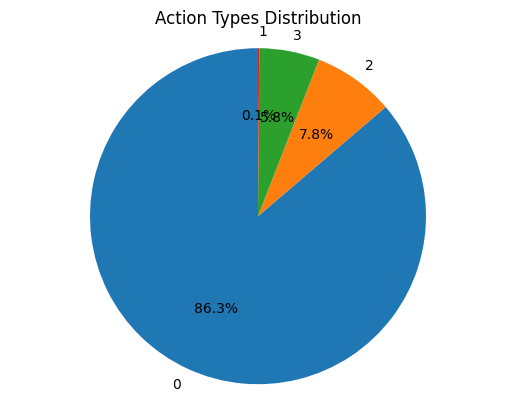

In [ ]:
action_counts = merged_data['action_type'].value_counts()
plt.pie(action_counts, labels=action_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title("Action Types Distribution")
plt.show()

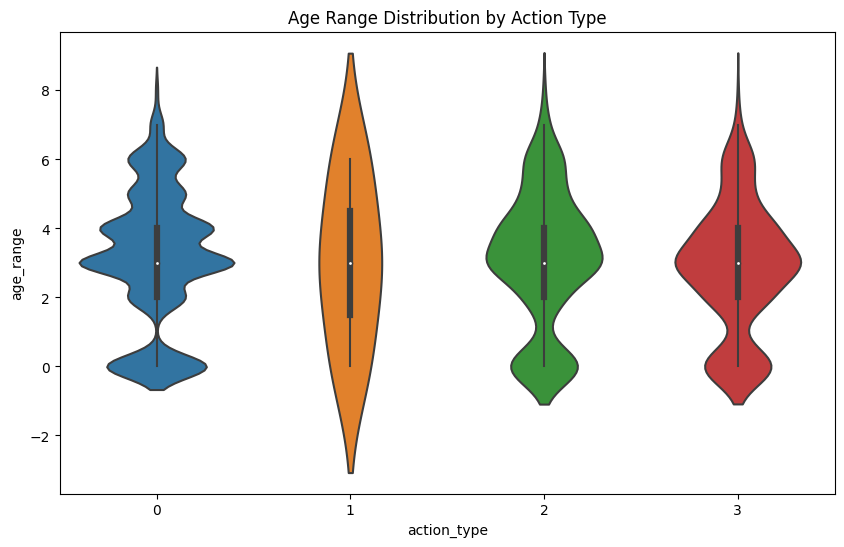

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='action_type', y='age_range', data=merged_data)
plt.title("Age Range Distribution by Action Type")
plt.show()

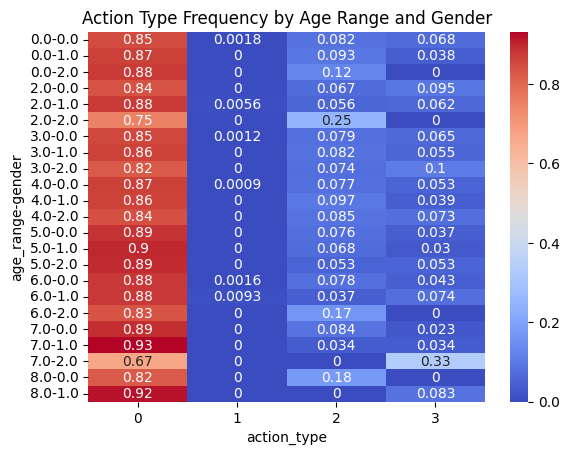

In [ ]:
age_gender_action = merged_data.groupby(['age_range', 'gender', 'action_type']).size().unstack()
age_gender_action.fillna(0, inplace=True)

# Normalize the data
age_gender_action = age_gender_action.div(age_gender_action.sum(axis=1), axis=0)

sns.heatmap(age_gender_action, annot=True, cmap='coolwarm')
plt.title("Action Type Frequency by Age Range and Gender")
plt.show()